Reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

%matplotlib inline

In [2]:
hist_data = pd.read_csv('historical_user_logs.csv')

In [3]:
train_data = pd.read_csv('train.csv')

Exploratory Data Analysis

In [4]:
hist_data['action'].unique()

array(['view', 'interest'], dtype=object)

In [5]:
hist_data.head()

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view


In [6]:
train_data.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [7]:
len(train_data)

463291

In [8]:
len(hist_data)

24287534

In [9]:
train_data['session_id'].nunique()

463291

Session ID is the Unique ID for train_data

In [10]:
train_data.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463290,45023,2017-07-07 23:59,1113780,C,405490,60305,3,NaN,5.0,Male,5.0,3.0,4.0,0,0


In [11]:
train_data.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1', 'is_click'],
      dtype='object')

In [12]:
test_data = pd.read_csv('test.csv')

In [13]:
test_data.columns

Index(['session_id', 'DateTime', 'user_id', 'product', 'campaign_id',
       'webpage_id', 'product_category_1', 'product_category_2',
       'user_group_id', 'gender', 'age_level', 'user_depth',
       'city_development_index', 'var_1'],
      dtype='object')

In [14]:
test_data.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1
0,411705,2017-07-08 00:00,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0
1,208263,2017-07-08 00:00,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1
2,239450,2017-07-08 00:00,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1
3,547761,2017-07-08 00:00,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0
4,574275,2017-07-08 00:00,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1


In [15]:
train_data[train_data['is_click']==1]

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
38,489923,2017-07-02 00:05,929999,H,359520,13787,3,NaN,2.0,Male,2.0,2.0,NaN,0,1
54,419802,2017-07-02 00:07,740951,G,98970,6970,4,NaN,9.0,Female,3.0,3.0,4.0,1,1
65,145098,2017-07-02 00:08,1005580,C,359520,13787,4,NaN,3.0,Male,3.0,3.0,NaN,0,1
106,102183,2017-07-02 00:13,504394,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,NaN,0,1
107,72843,2017-07-02 00:13,963568,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,3.0,1,1
119,103188,2017-07-02 00:14,172910,C,405490,60305,3,NaN,NaN,NaN,NaN,NaN,NaN,0,1
129,305918,2017-07-02 00:16,908696,C,360936,13787,5,NaN,4.0,Male,4.0,3.0,1.0,1,1
149,319808,2017-07-02 00:18,1011276,H,359520,13787,4,NaN,2.0,Male,2.0,3.0,2.0,0,1
173,175741,2017-07-02 00:23,880382,C,359520,13787,4,NaN,1.0,Male,1.0,3.0,2.0,1,1
183,1867,2017-07-02 00:24,529719,I,404347,53587,1,146115.0,2.0,Male,2.0,3.0,2.0,1,1


In [16]:
train_data.nunique()

session_id                463291
DateTime                    8610
user_id                   150347
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
product_category_2            29
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       2
dtype: int64

Distribution of the target variable in the train dataset

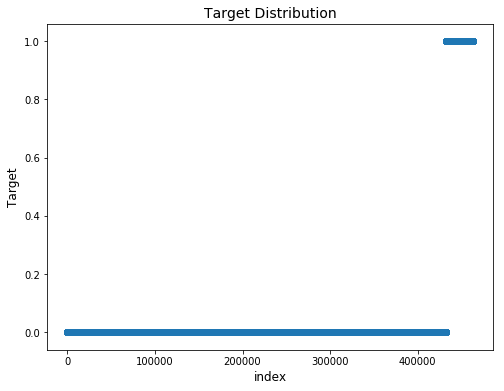

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_data.shape[0]), np.sort(train_data['is_click'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Target Distribution", fontsize=14)
plt.show()

C:\Users\Anagha Rumade\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


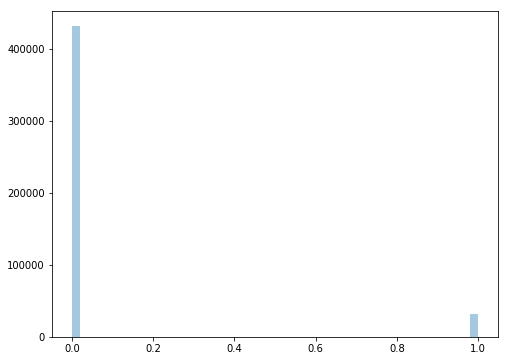

In [18]:
plt.figure(figsize=(8,6))
sns.distplot(train_data['is_click'].values, kde=False)

In [19]:
train_data[train_data['is_click']==1].nunique()

session_id                31331
DateTime                   7214
user_id                   25377
product                      10
campaign_id                  10
webpage_id                    9
product_category_1            5
product_category_2           14
user_group_id                13
gender                        2
age_level                     7
user_depth                    3
city_development_index        4
var_1                         2
is_click                      1
dtype: int64

Creating a Baseline model with all the Feature and nothing from the historical data

In [20]:
train_data.dtypes

session_id                  int64
DateTime                   object
user_id                     int64
product                    object
campaign_id                 int64
webpage_id                  int64
product_category_1          int64
product_category_2        float64
user_group_id             float64
gender                     object
age_level                 float64
user_depth                float64
city_development_index    float64
var_1                       int64
is_click                    int64
dtype: object

In [21]:
df = train_data.drop(['session_id','DateTime', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index'], axis=1)

In [22]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
df.isnull().sum(axis =0)

user_id               0
campaign_id           0
webpage_id            0
product_category_1    0
var_1                 0
is_click              0
product_B             0
product_C             0
product_D             0
product_E             0
product_F             0
product_G             0
product_H             0
product_I             0
product_J             0
gender_Male           0
dtype: int64

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.cross_validation import cross_val_score

C:\Users\Anagha Rumade\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
#%time
cross_val_score(RandomForestClassifier(n_estimators=10)
                , df.loc[:,df.columns != 'is_click']
                , df['is_click']
                , cv=3, scoring='roc_auc').mean()

0.5092547560373818

In [26]:
cross_val_score(LogisticRegression()
                , df.loc[:,df.columns != 'is_click']
                , df['is_click']
                , cv=3
                , scoring='roc_auc').mean()

0.5000108006211893

In [27]:
cross_val_score(xgboost.XGBClassifier(n_estimators=100)
                , df.loc[:, df.columns != 'is_click']
                , df['is_click']
                , cv=5, scoring='roc_auc').mean()

0.5700916890809644

In [28]:
'''
cross_val_score(SVC(probability=True)
                , df.loc[:, df.columns != 'is_click']
                , df['is_click']
                , cv=3
                , scoring='roc_auc').mean()
'''

"\ncross_val_score(SVC(probability=True)\n                , df.loc[:, df.columns != 'is_click']\n                , df['is_click']\n                , cv=3\n                , scoring='roc_auc').mean()\n"

In [29]:
xgb = xgboost.XGBClassifier()

In [30]:
xgb.fit(df.loc[:, df.columns != 'is_click'], df['is_click'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [32]:
df_test = test_data.drop(['session_id','DateTime', 'product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index'], axis=1)

In [33]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [34]:
y_pred = xgb.predict_proba(df_test)

In [35]:
y_pred

array([[0.9075737 , 0.09242628],
       [0.9391413 , 0.06085875],
       [0.94074076, 0.05925925],
       ...,
       [0.9480131 , 0.05198685],
       [0.9372296 , 0.06277041],
       [0.9291829 , 0.0708171 ]], dtype=float32)

In [39]:
submission = pd.DataFrame()
submission['session_id'] = test_data['session_id']

In [41]:
submission['is_click'] = y_pred[:,1]

In [42]:
submission.to_csv('submission_1.csv', index=False)

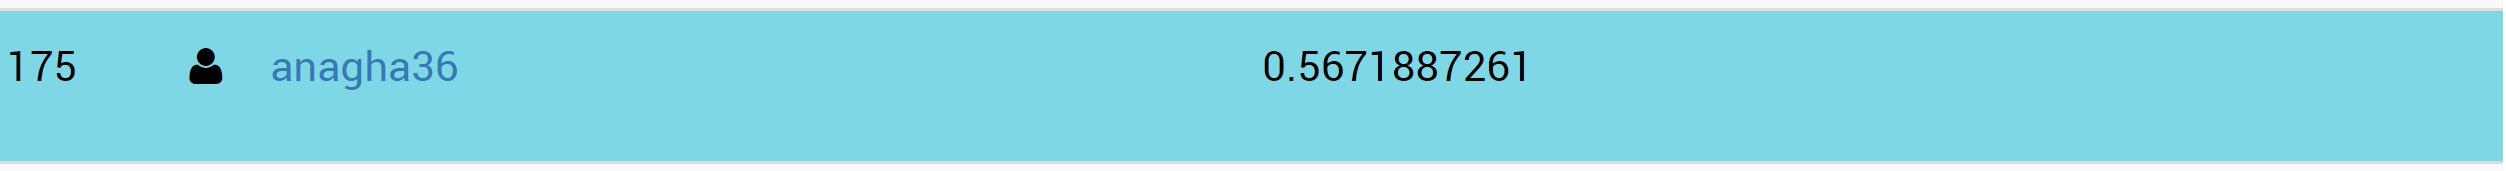

Dealing with Missing Values in the next notebook

In [44]:
train_data['user_group_id'].nunique()

13

In [31]:
#Deal with Missing values, One Hot encode DateTime?